# Part 3 – Developing k-NN for Regression Problems

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class MLPart3:
    def __init__(self, __trainingDataFile, __testDataFile, __k):
        self.weight = 10000
        self.trainingDataFileName = __trainingDataFile
        self.testDataFileName = __testDataFile
        self.trainingData = np.array([])
        self.testData = np.array([])
        self.euclideanDistances = np.array([])
        self.euclideanDistancesSorted = np.array([])
        self.predictions = np.array([])
        self.originalValues = np.array([])
        self.readInstances()
        self.k = __k
        #self.accuracy

    def readInstances(self):
        """
        Reading an instance from fName
        """
        self.trainingData = np.genfromtxt(self.trainingDataFileName, delimiter=',', dtype=float)
        self.testData = np.genfromtxt(self.testDataFileName, delimiter=',', dtype=float)
        self.originalValues = self.testData[:, -1]

    # Works on local variables and returns 2 numpy array
    def calculateDistances(self,trainingInstancesMatrix, singlQueryPoint):
        data = np.sqrt(np.sum((trainingInstancesMatrix - singlQueryPoint) ** 2, axis=1))
        return data, np.argsort(data)

    # Works on global variables
    def updateDistances(self):
         distances = []
         sortedDistances = []
         for i in range(0, np.shape(self.testData)[0]):
            d, sd = self.calculateDistances(self.trainingData[:, :-1], self.testData[i, :-1])
            distances.append(d)
            sortedDistances.append(sd)
         self.euclideanDistances = np.array(distances)
         self.euclideanDistancesSorted = np.array(sortedDistances)

    def predictValue(self):
        indices = self.euclideanDistancesSorted[:, :self.k]
        values_of_neighbours = self.trainingData[indices, -1]
        #print(np.shape(values_of_neighbours))
        neighbours_euclideanDistances = self.euclideanDistances[:, indices[0]]
        neighbours_distances_inverse_squared = 1/np.square(neighbours_euclideanDistances)
        for i in range(0,self.testData.shape[0]):
            self.predictions = np.append(self.predictions, np.sum(neighbours_distances_inverse_squared[i,:] * values_of_neighbours[i,:])/np.sum(neighbours_distances_inverse_squared[i,:]))

    def predictionAccuracy(self):
        prediction = np.array([])
        originalValues = self.testData[:, -1]
        numerator = np.sum(np.square(self.predictions - self.testData[:, -1]))
        denominator = np.sum(np.square(np.average(self.testData[:, -1]) - self.testData[:, -1]))
        accuracy = 1 - (numerator/denominator)
        return accuracy * 100


    def search(self):
        self.updateDistances()
        self.predictValue()
        return self.predictionAccuracy()

    




# Contructor signiture
<br/>def __init__(self, __trainingDataFile, __testDataFile, __k):

 __trainingDataFile: Path of the training data<br>
 __testDataFile : Path of the test data<br>
 __k : Value of K

<h3>Search method returns the prediction accuracy based on configuration</h3>

Prediction accuracy is 67.4443000898232 for K = 1 
Prediction accuracy is 78.6938359867743 for K = 2 
Prediction accuracy is 81.60403178072484 for K = 3 
Prediction accuracy is 83.17721403823238 for K = 4 
Prediction accuracy is 83.82629112426686 for K = 5 
Prediction accuracy is 84.22475796811352 for K = 6 
Prediction accuracy is 84.25552084492433 for K = 7 
Prediction accuracy is 84.4601803149515 for K = 8 
Prediction accuracy is 84.4625097861085 for K = 9 
Prediction accuracy is 84.61930388141816 for K = 10 
Prediction accuracy is 84.53360785267833 for K = 11 
Prediction accuracy is 84.42498718491855 for K = 12 
Prediction accuracy is 84.20936157220187 for K = 13 
Prediction accuracy is 84.08178138724982 for K = 14 
Prediction accuracy is 83.77647205235606 for K = 15 
Prediction accuracy is 83.66983005535118 for K = 16 
Prediction accuracy is 83.38948340673821 for K = 17 
Prediction accuracy is 83.27078154990141 for K = 18 
Prediction accuracy is 83.17184293165428 for K = 19 
Predic

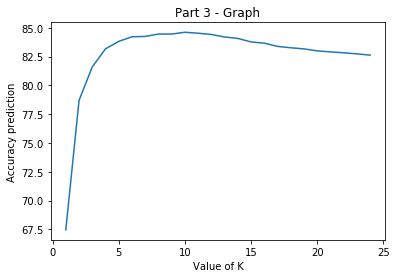

In [7]:
prediction_over_k = np.array([])   
K = np.array([])
for i in range(1,25):
    ml = MLPart3("data\\regression\\trainingData.csv", "data\\regression\\testData.csv", i)
    tmp = ml.search()
    print("Prediction accuracy is {} for K = {} ".format(tmp,i))
    K = np.append(K,i)
    prediction_over_k = np.append(prediction_over_k, tmp)

plt.xlabel("Value of K")
plt.ylabel("Accuracy prediction")
plt.title("Part 3 - Graph")
plt.plot(K,prediction_over_k)
plt.show()

# Part3 b

By default, a k-NN algorithm will weigh the contribution of each feature equally when using standard Euclidean distance. In your report document clearly explain why this could negatively impact the performance of your k-NN model. 

Note: Few points from notes

<h3>If all features are included equally</h3>
<h4><li>Some features may be redundant or less relevant</h4>
<h4><li>Number of features may skew the result even through they might of
little or no impact to the classification</h4>


#  Possible methods for tackling the issue

<h4><li>xgboost</h4>
<p> XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm.
    In gradient boosted technique used ensemble of weak prediction models, ensemble methods use multiple learning algorithms to obtain better predictive performance.Supervised learning method that is based on function approximation by optimizing specific loss functions as well as applying several regularization techniques.
<h4><li>Principal Component Analysis (dimensionality reduction)</h4>
<p> Principal Component Analysis (PCA) is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set.
<h4><li>Backward elimination</h4>
<p>As the name suggest, in backward elimination we will eliminate unfit features from the feature set and then use the fit features only. 
<h4><li>Assign Weight to each dimension (Optimise weighting to minimise error)</h4>
<p> Assigning weight is a yet another technique to imporve performance, as it gives more weight to nearer neighbour. 
<h4><li>Normalize each feature independently</h4>
<p> If the data is not normalize, we can normalize the features and bring all the features between the range 0 to 1. This can imporve the performance of the model.
<h4><li>Select K best</h4>
<p>SelectKBest selects the top k features that have maximum relevance with the target variable.
    
<h4>Standardization</h4>
<p>Rescaling features to follow Guassian Distribution with mean=0 and standard deviation=1
    <p> Formula: new value = feature-mean/standard deviation
<h4>Normalization</h4>
<p>Process of scaling features between 0  to 1 values (sometimes -1 to 1 ).Normalization is sensitive to outliers.



# Dropped 1 feature : Select K best features

In [175]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

train = pd.read_csv("data/classification/trainingData.csv",delimiter=',',header= None)  # load train data
test = pd.read_csv("data/classification/testData.csv",delimiter=',',header= None)  # load test data
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]

X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

X_training = SelectKBest(chi2, k=9).fit_transform(X_train, y_train)
X_test = SelectKBest(chi2, k=9).fit_transform(X_test, y_test)

In [176]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

class MLPart3b:
    def __init__(self, __trainingDataFile, __testDataFile, __k):
        self.trainingDataFileName = __trainingDataFile
        self.testDataFileName = __testDataFile
        self.trainingData = np.array([])
        self.testData = np.array([])
        self.euclideanDistances = np.array([])
        self.euclideanDistancesSorted = np.array([])
        self.predictions = np.array([])
        self.originalCategories = np.array([])
        self.readInstances()
        self.k = __k

    def readInstances(self):
        """
        Reading an instance from fName
        """
        self.trainingDataOrg = np.genfromtxt(self.trainingDataFileName, delimiter=',', dtype=float)
        self.testDataOrg = np.genfromtxt(self.testDataFileName, delimiter=',', dtype=float)
        self.originalCategories = self.testDataOrg[:, -1]
        
        self.trainingData = X_training
        self.testData = X_test 
        self.testData = np.array(self.testData)
        
        j=0
        testData = []
        for i in self.testData:
            tmp = i.tolist()
            tmp.append(self.testDataOrg[j,-1])
            j+=1
            testData.append(tmp)
        
        self.testData = np.array(testData)  
        
        j=0
        trainData = []
        for i in self.trainingData:
            tmp = i.tolist()
            tmp.append(self.trainingDataOrg[j,-1])
            j+=1
            trainData.append(tmp)
        self.trainingData = np.array(trainData)
        
    # Works on local variables and returns 2 numpy array
    def calculateDistances(self,trainingInstancesMatrix, singlQueryPoint):
        data = np.sqrt(np.sum((trainingInstancesMatrix - singlQueryPoint) ** 2, axis=1))
        return data, np.argsort(data)

    # Works on global variables
    def updateDistances(self):
         distances = []
         sortedDistances = []
         for i in range(0, np.shape(self.testData)[0]):
            d, sd = self.calculateDistances(self.trainingData[:, :-1], self.testData[i, :-1])
            distances.append(d)
            sortedDistances.append(sd)
            i+= 1
         self.euclideanDistances = np.array(distances)
         self.euclideanDistancesSorted = np.array(sortedDistances)

    def predictCategories(self):
        prediction = np.array([])
        # To order tp improve performance, avoid calculation with K=1
        if self.k == 1:
            for i in range(0, len(self.euclideanDistances)):
                index = self.euclideanDistancesSorted[i][0]
                prediction = np.append(prediction, self.trainingData[index][-1])
        else:
            for i in range(0, len(self.euclideanDistances)):
                indices = self.euclideanDistancesSorted[i, :self.k]
                indice_category_distance = {}
                tie = []
                for indice in indices:
                    tie.append(self.trainingData[indice][-1])
                data = Counter(tie)
                #print(data.most_common(1)[0][0])  # Returns the highest occurring item
                prediction = np.append(prediction, data.most_common(1)[0][0])
        self.predictions = prediction


    def predictionAccuracy(self):
        instancesCount = len(self.originalCategories)
        correctPredictionCounter = 0
        for i in range(0,instancesCount):
            if self.originalCategories[i] == self.predictions[i]:
                correctPredictionCounter +=1
        return (correctPredictionCounter/instancesCount) * 100

    def viewData(self):
        print(self.euclideanDistances)

    def search(self):
        self.updateDistances()
        self.predictCategories()
        return self.predictionAccuracy()

Prediction accuracy is 88.3 for K = 1 
Prediction accuracy is 88.3 for K = 2 
Prediction accuracy is 89.8 for K = 3 
Prediction accuracy is 89.9 for K = 4 
Prediction accuracy is 89.60000000000001 for K = 5 
Prediction accuracy is 90.2 for K = 6 
Prediction accuracy is 89.5 for K = 7 
Prediction accuracy is 90.7 for K = 8 
Prediction accuracy is 90.2 for K = 9 
Prediction accuracy is 90.2 for K = 10 
Prediction accuracy is 90.5 for K = 11 
Prediction accuracy is 90.60000000000001 for K = 12 
Prediction accuracy is 89.8 for K = 13 
Prediction accuracy is 89.9 for K = 14 
Prediction accuracy is 89.8 for K = 15 
Prediction accuracy is 89.7 for K = 16 
Prediction accuracy is 89.8 for K = 17 
Prediction accuracy is 90.3 for K = 18 
Prediction accuracy is 90.3 for K = 19 
Prediction accuracy is 90.10000000000001 for K = 20 
Prediction accuracy is 89.4 for K = 21 
Prediction accuracy is 90.2 for K = 22 
Prediction accuracy is 89.8 for K = 23 
Prediction accuracy is 89.4 for K = 24 
Prediction

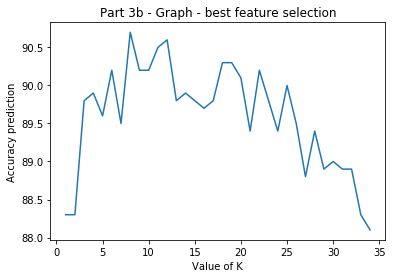

In [177]:
prediction_over_k = np.array([])   
K = np.array([])
for i in range(1,35):
    ml = MLPart3b("data\\classification\\trainingData.csv", "data\\classification\\testData.csv", i)
    tmp = ml.search()
    print("Prediction accuracy is {} for K = {} ".format(tmp,i))
    K = np.append(K,i)
    prediction_over_k = np.append(prediction_over_k, tmp)

plt.xlabel("Value of K")
plt.ylabel("Accuracy prediction")
plt.title("Part 3b - Graph - best feature selection")
plt.plot(K,prediction_over_k)
plt.show()

# Dropped 2 feature  :  Select K best features

In [178]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

train = pd.read_csv("data/classification/trainingData.csv",delimiter=',',header= None)  # load train data
test = pd.read_csv("data/classification/testData.csv",delimiter=',',header= None)  # load test data
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]

X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

X_training = SelectKBest(chi2, k=8).fit_transform(X_train, y_train)
X_test = SelectKBest(chi2, k=8).fit_transform(X_test, y_test)

In [179]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

class MLPart3b:
    def __init__(self, __trainingDataFile, __testDataFile, __k):
        self.trainingDataFileName = __trainingDataFile
        self.testDataFileName = __testDataFile
        self.trainingData = np.array([])
        self.testData = np.array([])
        self.euclideanDistances = np.array([])
        self.euclideanDistancesSorted = np.array([])
        self.predictions = np.array([])
        self.originalCategories = np.array([])
        self.readInstances()
        self.k = __k

    def readInstances(self):
        """
        Reading an instance from fName
        """
        self.trainingDataOrg = np.genfromtxt(self.trainingDataFileName, delimiter=',', dtype=float)
        self.testDataOrg = np.genfromtxt(self.testDataFileName, delimiter=',', dtype=float)
        self.originalCategories = self.testDataOrg[:, -1]
        
        self.trainingData = X_training
        self.testData = X_test 
        self.testData = np.array(self.testData)
        
        j=0
        testData = []
        for i in self.testData:
            tmp = i.tolist()
            tmp.append(self.testDataOrg[j,-1])
            j+=1
            testData.append(tmp)
        
        self.testData = np.array(testData)  
        
        j=0
        trainData = []
        for i in self.trainingData:
            tmp = i.tolist()
            tmp.append(self.trainingDataOrg[j,-1])
            j+=1
            trainData.append(tmp)
        self.trainingData = np.array(trainData)
        
    # Works on local variables and returns 2 numpy array
    def calculateDistances(self,trainingInstancesMatrix, singlQueryPoint):
        data = np.sqrt(np.sum((trainingInstancesMatrix - singlQueryPoint) ** 2, axis=1))
        return data, np.argsort(data)

    # Works on global variables
    def updateDistances(self):
         distances = []
         sortedDistances = []
         for i in range(0, np.shape(self.testData)[0]):
            d, sd = self.calculateDistances(self.trainingData[:, :-1], self.testData[i, :-1])
            distances.append(d)
            sortedDistances.append(sd)
            i+= 1
         self.euclideanDistances = np.array(distances)
         self.euclideanDistancesSorted = np.array(sortedDistances)

    def predictCategories(self):
        prediction = np.array([])
        # To order tp improve performance, avoid calculation with K=1
        if self.k == 1:
            for i in range(0, len(self.euclideanDistances)):
                index = self.euclideanDistancesSorted[i][0]
                prediction = np.append(prediction, self.trainingData[index][-1])
        else:
            for i in range(0, len(self.euclideanDistances)):
                indices = self.euclideanDistancesSorted[i, :self.k]
                indice_category_distance = {}
                tie = []
                for indice in indices:
                    tie.append(self.trainingData[indice][-1])
                data = Counter(tie)
                #print(data.most_common(1)[0][0])  # Returns the highest occurring item
                prediction = np.append(prediction, data.most_common(1)[0][0])
        self.predictions = prediction


    def predictionAccuracy(self):
        instancesCount = len(self.originalCategories)
        correctPredictionCounter = 0
        for i in range(0,instancesCount):
            if self.originalCategories[i] == self.predictions[i]:
                correctPredictionCounter +=1
        return (correctPredictionCounter/instancesCount) * 100

    def viewData(self):
        print(self.euclideanDistances)

    def search(self):
        self.updateDistances()
        self.predictCategories()
        return self.predictionAccuracy()

Prediction accuracy is 67.30000000000001 for K = 1 
Prediction accuracy is 67.30000000000001 for K = 2 
Prediction accuracy is 69.0 for K = 3 
Prediction accuracy is 69.8 for K = 4 
Prediction accuracy is 70.0 for K = 5 
Prediction accuracy is 69.89999999999999 for K = 6 
Prediction accuracy is 71.5 for K = 7 
Prediction accuracy is 71.8 for K = 8 
Prediction accuracy is 71.7 for K = 9 
Prediction accuracy is 71.3 for K = 10 
Prediction accuracy is 71.7 for K = 11 
Prediction accuracy is 72.39999999999999 for K = 12 
Prediction accuracy is 72.0 for K = 13 
Prediction accuracy is 72.8 for K = 14 
Prediction accuracy is 72.6 for K = 15 
Prediction accuracy is 72.3 for K = 16 
Prediction accuracy is 72.39999999999999 for K = 17 
Prediction accuracy is 72.5 for K = 18 
Prediction accuracy is 72.89999999999999 for K = 19 
Prediction accuracy is 72.7 for K = 20 
Prediction accuracy is 72.5 for K = 21 
Prediction accuracy is 72.5 for K = 22 
Prediction accuracy is 72.39999999999999 for K = 23

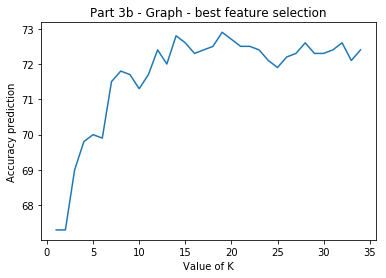

In [180]:
prediction_over_k = np.array([])   
K = np.array([])
for i in range(1,35):
    ml = MLPart3b("data\\classification\\trainingData.csv", "data\\classification\\testData.csv", i)
    tmp = ml.search()
    print("Prediction accuracy is {} for K = {} ".format(tmp,i))
    K = np.append(K,i)
    prediction_over_k = np.append(prediction_over_k, tmp)

plt.xlabel("Value of K")
plt.ylabel("Accuracy prediction")
plt.title("Part 3b - Graph - best feature selection")
plt.plot(K,prediction_over_k)
plt.show()

# Dropped 3 feature :  Select K best features

In [181]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

train = pd.read_csv("data/classification/trainingData.csv",delimiter=',',header= None)  # load train data
test = pd.read_csv("data/classification/testData.csv",delimiter=',',header= None)  # load test data
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]

X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

X_training = SelectKBest(chi2, k=7).fit_transform(X_train, y_train)
X_test = SelectKBest(chi2, k=7).fit_transform(X_test, y_test)

In [182]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

class MLPart3b:
    def __init__(self, __trainingDataFile, __testDataFile, __k):
        self.trainingDataFileName = __trainingDataFile
        self.testDataFileName = __testDataFile
        self.trainingData = np.array([])
        self.testData = np.array([])
        self.euclideanDistances = np.array([])
        self.euclideanDistancesSorted = np.array([])
        self.predictions = np.array([])
        self.originalCategories = np.array([])
        self.readInstances()
        self.k = __k

    def readInstances(self):
        """
        Reading an instance from fName
        """
        self.trainingDataOrg = np.genfromtxt(self.trainingDataFileName, delimiter=',', dtype=float)
        self.testDataOrg = np.genfromtxt(self.testDataFileName, delimiter=',', dtype=float)
        self.originalCategories = self.testDataOrg[:, -1]
        
        self.trainingData = X_training
        self.testData = X_test 
        self.testData = np.array(self.testData)
        
        j=0
        testData = []
        for i in self.testData:
            tmp = i.tolist()
            tmp.append(self.testDataOrg[j,-1])
            j+=1
            testData.append(tmp)
        
        self.testData = np.array(testData)  
        
        j=0
        trainData = []
        for i in self.trainingData:
            tmp = i.tolist()
            tmp.append(self.trainingDataOrg[j,-1])
            j+=1
            trainData.append(tmp)
        self.trainingData = np.array(trainData)
        
    # Works on local variables and returns 2 numpy array
    def calculateDistances(self,trainingInstancesMatrix, singlQueryPoint):
        data = np.sqrt(np.sum((trainingInstancesMatrix - singlQueryPoint) ** 2, axis=1))
        return data, np.argsort(data)

    # Works on global variables
    def updateDistances(self):
         distances = []
         sortedDistances = []
         for i in range(0, np.shape(self.testData)[0]):
            d, sd = self.calculateDistances(self.trainingData[:, :-1], self.testData[i, :-1])
            distances.append(d)
            sortedDistances.append(sd)
            i+= 1
         self.euclideanDistances = np.array(distances)
         self.euclideanDistancesSorted = np.array(sortedDistances)

    def predictCategories(self):
        prediction = np.array([])
        # To order tp improve performance, avoid calculation with K=1
        if self.k == 1:
            for i in range(0, len(self.euclideanDistances)):
                index = self.euclideanDistancesSorted[i][0]
                prediction = np.append(prediction, self.trainingData[index][-1])
        else:
            for i in range(0, len(self.euclideanDistances)):
                indices = self.euclideanDistancesSorted[i, :self.k]
                indice_category_distance = {}
                tie = []
                for indice in indices:
                    tie.append(self.trainingData[indice][-1])
                data = Counter(tie)
                #print(data.most_common(1)[0][0])  # Returns the highest occurring item
                prediction = np.append(prediction, data.most_common(1)[0][0])
        self.predictions = prediction


    def predictionAccuracy(self):
        instancesCount = len(self.originalCategories)
        correctPredictionCounter = 0
        for i in range(0,instancesCount):
            if self.originalCategories[i] == self.predictions[i]:
                correctPredictionCounter +=1
        return (correctPredictionCounter/instancesCount) * 100

    def viewData(self):
        print(self.euclideanDistances)

    def search(self):
        self.updateDistances()
        self.predictCategories()
        return self.predictionAccuracy()

Prediction accuracy is 81.5 for K = 1 
Prediction accuracy is 81.5 for K = 2 
Prediction accuracy is 85.39999999999999 for K = 3 
Prediction accuracy is 85.9 for K = 4 
Prediction accuracy is 85.5 for K = 5 
Prediction accuracy is 85.6 for K = 6 
Prediction accuracy is 85.39999999999999 for K = 7 
Prediction accuracy is 85.6 for K = 8 
Prediction accuracy is 85.1 for K = 9 
Prediction accuracy is 85.7 for K = 10 
Prediction accuracy is 85.1 for K = 11 
Prediction accuracy is 85.6 for K = 12 
Prediction accuracy is 85.5 for K = 13 
Prediction accuracy is 85.6 for K = 14 
Prediction accuracy is 85.0 for K = 15 
Prediction accuracy is 85.1 for K = 16 
Prediction accuracy is 84.39999999999999 for K = 17 
Prediction accuracy is 84.8 for K = 18 
Prediction accuracy is 84.39999999999999 for K = 19 
Prediction accuracy is 84.89999999999999 for K = 20 
Prediction accuracy is 84.6 for K = 21 
Prediction accuracy is 84.6 for K = 22 
Prediction accuracy is 85.1 for K = 23 
Prediction accuracy is 8

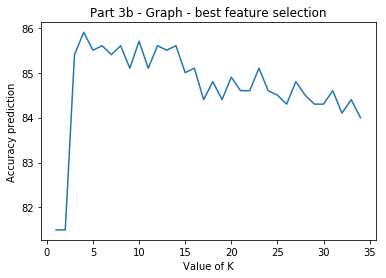

In [172]:
prediction_over_k = np.array([])   
K = np.array([])
for i in range(1,35):
    ml = MLPart3b("data\\classification\\trainingData.csv", "data\\classification\\testData.csv", i)
    tmp = ml.search()
    print("Prediction accuracy is {} for K = {} ".format(tmp,i))
    K = np.append(K,i)
    prediction_over_k = np.append(prediction_over_k, tmp)

plt.xlabel("Value of K")
plt.ylabel("Accuracy prediction")
plt.title("Part 3b - Graph - best feature selection")
plt.plot(K,prediction_over_k)
plt.show()

# Observations


<h5>With current dataset, Select K best does not give us better result</h5>
